In [54]:
import matplotlib.pyplot as plt
from openml import datasets, tasks, runs, flows, setups
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [34]:
# Find top sklearn.pipeline Flow (with most number of runs)
flowsJson = flows.list_flows()
flowList = pd.DataFrame(flowsJson).transpose()
sklearnPipelineFlows = flowList.loc[flowList.full_name.str.startswith('sklearn.pipeline')]
sklearnRuns = pd.DataFrame(runs.list_runs(flow=sklearnPipelineFlows.id)).transpose()
sklearnRuns.groupby('flow_id').agg('count').sort_values('run_id', ascending = 0)
topFlow = sklearnRuns.groupby('flow_id').agg('count').sort_values('run_id', ascending = 0)[0:1] # flow_id = 5909

In [35]:
# Count the number of runs for each flow and task and provide a sample run
topFlowRuns = pd.DataFrame(runs.list_runs(flow=topFlow.index)).transpose()
f = {'run_id':['first','size']}
allRunsTopFlow = topFlowRuns.groupby(['flow_id','task_id']).agg(f).reset_index()
allRunsTopFlow.columns = ['flow', 'task','run', 'count']
allRunsTopFlow['single_execution_time'] = ''

In [41]:
# Re-run each flow and task to measure its time
import datetime
for i, row in allRunsTopFlow.iterrows():
    f = flows.get_flow(row.flow)
    t = tasks.get_task(row.task)
    a = datetime.datetime.now()
    runs.run_flow_on_task(t,f)
    b = datetime.datetime.now()
    delta = b - a
    ti = delta.total_seconds()
    print('executed task {}, in {} seconds'.format(i, ti))
    allRunsTopFlow.set_value(i,'single_execution_time', ti)
    #allRunsTopFlow.set_value(i,'time_total', ti * row.count)
allRunsTopFlow.to_csv('top-flow-time.csv')    

executed task 0, in 1.283132 seconds
executed task 1, in 2.316795 seconds
executed task 2, in 12.456413 seconds
executed task 3, in 1.126984 seconds
executed task 4, in 3.65409 seconds
executed task 5, in 2.364133 seconds
executed task 6, in 1.187904 seconds
executed task 7, in 2.3304 seconds
executed task 8, in 1.719811 seconds
executed task 9, in 4.137435 seconds
executed task 10, in 1.356666 seconds
executed task 11, in 2.147308 seconds
executed task 12, in 1.432005 seconds
executed task 13, in 3.073723 seconds
executed task 14, in 4.986094 seconds
executed task 15, in 1.210295 seconds
executed task 16, in 1.372695 seconds
executed task 17, in 4.950061 seconds
executed task 18, in 1.642055 seconds
executed task 19, in 1.18121 seconds
executed task 20, in 1.418553 seconds
executed task 21, in 3.411171 seconds
executed task 22, in 3.031358 seconds
executed task 23, in 1.256085 seconds
executed task 24, in 1.295296 seconds
executed task 25, in 3.902751 seconds
executed task 26, in 11.6

In [44]:
allRunsTopFlow.to_csv('top-flow-time.csv')  

In [67]:
# Read the dataframe from file
df = pd.DataFrame.from_csv('top-flow-time.csv')
df['total_execution_time'] = df['count'] * df['single_execution_time']

- Most popular Flow (pipeline) with id 5909:
- sklearn.pipeline.Pipeline(imputer=sklearn.preprocessing.imputation.Imputer,pca=sklearn.decomposition.pca.PCA,randomforestclassifier=sklearn.ensemble.forest.RandomForestClassifier)
    
    
 

- Executed on 100 unique tasks a total of 897 times
- Sum of repeated execution time on all tasks = 7529 seconds
- Sum of single execution time on all tasks = 839.7 seconds
- Almost an order of magnitude faster

Figure below shows the difference in total time of repeated most popular pipeline (flow 5909) execution vs the a single execution of the pipeline on inidividual tasks. (100 unique tasks wit a total of 897 execution of the pipeline)

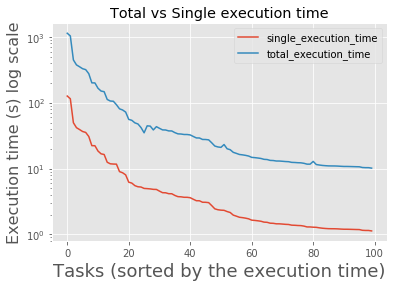

In [70]:
sdf = df.sort_values('single_execution_time', ascending=False).reset_index()
del sdf['index']
plt.plot(sdf['single_execution_time'])
plt.plot(sdf['total_execution_time'])
plt.yscale('log')
plt.xlabel('Tasks (sorted by the execution time)', fontsize=18)
plt.ylabel('Execution time (s) log scale', fontsize=16)
plt.title("Total vs Single execution time")
plt.legend()
plt.show()

plt.savefig('execution-time.png', bbox_inches='tight')